# Import Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis
from matplotlib.ticker import FixedLocator
import numpy as np
from scipy.optimize import curve_fit

# Load the MovieLens Dataset

In [2]:
# Load the Movie Lens dataset from kaggle
try:
    genome_tags = pd.read_csv("genome_tags.csv")
    genome_scores = pd.read_csv("genome_scores.csv")
    tags = pd.read_csv("tag.csv")
    ratings = pd.read_csv("rating.csv")
    movies = pd.read_csv("movie.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure all required files are present.")
    exit(1)

# EDA

In [3]:
# Explore and understand the data from the movielens dataset
print("==== Genome Tags ====")
print(genome_tags.head())
print("==== Genome Scores ====")
print(genome_scores.head())
print("==== Tags ====")
print(tags.head())
print("==== Ratings ====")
print(ratings.head())
print("==== Movies ====")
print(movies.head())

==== Genome Tags ====
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
==== Genome Scores ====
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675
==== Tags ====
   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18
==== Ratings ====
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 

In [4]:

# Load the datasets
genome_tags = pd.read_csv("genome_tags.csv")
genome_scores = pd.read_csv("genome_scores.csv")
links = pd.read_csv("link.csv")
tags = pd.read_csv("tag.csv")
ratings = pd.read_csv("rating.csv")
movies = pd.read_csv("movie.csv")

# Display basic information about each dataset
print("==== Genome Tags ====")
print(genome_tags.head())
print("==== Genome Scores ====")
print(genome_scores.head())
print("==== Links ====")
print(links.head())
print("==== Tags ====")
print(tags.head())
print("==== Ratings ====")
print(ratings.head())
print("==== Movies ====")
print(movies.head())


==== Genome Tags ====
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
==== Genome Scores ====
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675
==== Links ====
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
==== Tags ====
   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18
==== Ratings ====
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47

In [5]:
# Display basic information about the dataset
print("Dataset Information:")
print(movies.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None


In [6]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(movies.isnull().sum())


Missing Values:
movieId    0
title      0
genres     0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(movies.describe())


Summary Statistics:
             movieId
count   27278.000000
mean    59855.480570
std     44429.314697
min         1.000000
25%      6931.250000
50%     68068.000000
75%    100293.250000
max    131262.000000


In [8]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(ratings.isnull().sum())


Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [9]:
print("\nSummary Statistics:")
print(ratings.describe())


Summary Statistics:
             userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00


In [10]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(tags.isnull().sum())


Missing Values:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [11]:
print("\nSummary Statistics:")
print(tags.describe())


Summary Statistics:
              userId        movieId
count  465564.000000  465564.000000
mean    68712.354263   32627.762920
std     41877.674053   36080.241157
min        18.000000       1.000000
25%     28780.000000    2571.000000
50%     70201.000000    7373.000000
75%    107322.000000   62235.000000
max    138472.000000  131258.000000


In [12]:
# Basic statistics for ratings
ratings_stats = ratings.describe()

# Compute skewness and kurtosis for ratings
ratings_skewness = skew(ratings['rating'])
ratings_kurtosis = kurtosis(ratings['rating'])



# Print results
print("==== Ratings Statistics ====")
print(ratings_stats)
print("\nSkewness of Ratings:", ratings_skewness)
print("Kurtosis of Ratings:", ratings_kurtosis)


==== Ratings Statistics ====
             userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00

Skewness of Ratings: -0.6553111369463632
Kurtosis of Ratings: 0.13746649721500814


# Distribution of Movie genres

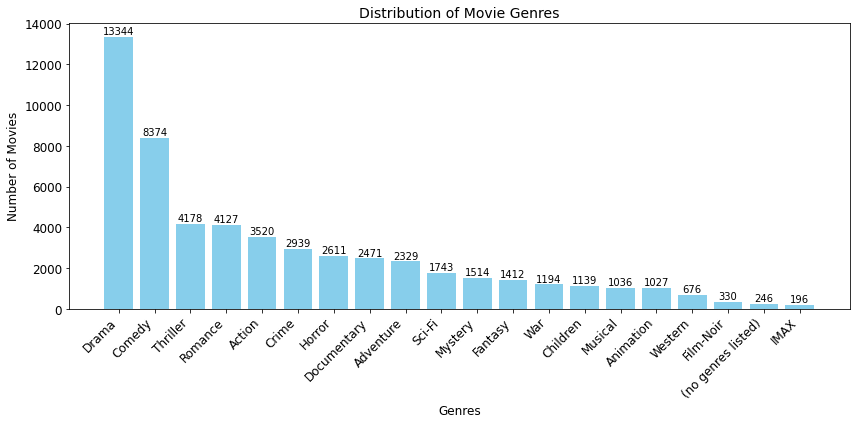

In [13]:
# Function to plot the distribution of Movie genres
def plot_genre_distribution(movies):
    
    """ 
    
    Function to plot the distribution of movie genres from the Movielens dataset 
    to determine the relative frequencies and distribution of various genres.
    It takes movies and plot the distribution of the genres.
    
    """
    plt.figure(figsize=(12, 6))
    genres_splits = movies['genres'].str.split('|', expand=True).stack()
    genre_counts = genres_splits.value_counts()
    
    # Bar Plot of Movie genres 
    bars = plt.bar(genre_counts.index, genre_counts.values, color='skyblue')

    # Add count on top of each bar for easy understanding
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 30, yval, ha='center', va='bottom')

    plt.title('Distribution of Movie Genres', fontsize = 14)
    plt.xlabel('Genres', fontsize = 12)
    plt.ylabel('Number of Movies', fontsize = 12)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig('genre_distribution.png')
    plt.show()

# Plot the Bar plot
plot_genre_distribution(movies)


# Histogram of Movie ratings

<ipython-input-14-9ed5e83502f6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}K'.format(x / 1000) for x in plt.gca().get_yticks()])


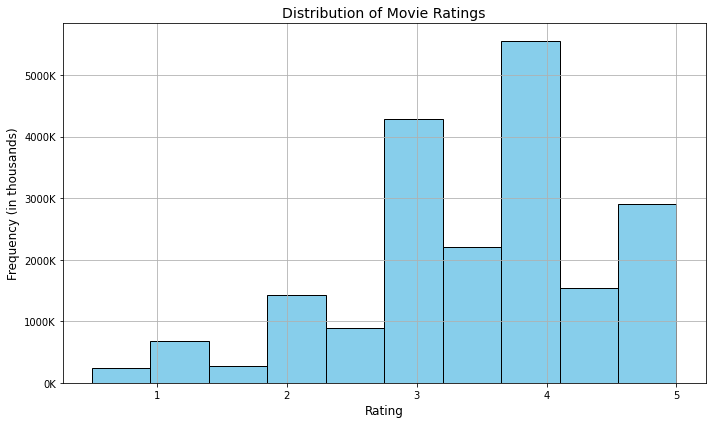

In [14]:
# Function to plot the movie ratings distribution
def plot_rating_distribution(ratings):
    """
    
    Function to plot the histogram of movie ratings.
    This helps understand the rating trends to assist filmmakers and content developers
    in determining audience preferences and tailoring their projects accordingly.
    It takes the ratings and plot the histogram of movie ratings.
    
    """
    plt.figure(figsize=(10, 6))
    plt.hist(ratings['rating'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of Movie Ratings', fontsize = 14)
    plt.xlabel('Rating', fontsize = 12)
    plt.ylabel('Frequency (in thousands)', fontsize = 12)
    
    # Change y-axis to values in 1000
    plt.gca().set_yticklabels(['{:.0f}K'.format(x / 1000) for x in plt.gca().get_yticks()])
    plt.gca().yaxis.set_major_locator(FixedLocator(plt.gca().get_yticks()))
    
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('Movie_Ratings_distribution.png')
    plt.show()

# Plot the histogram
plot_rating_distribution(ratings)


# Average Rating of Movies Over Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


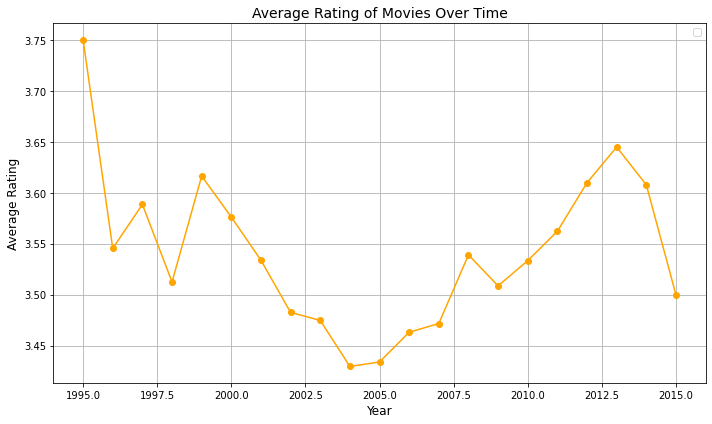

In [15]:
# Plot the average rating of movies over time from the data
def plot_average_rating_over_time(ratings):
    
    """
    
    Function to Plot the average rating of movies over time to 
    understand how the average movie rating has evolved.
    it takes ratings and plot the avg ratings of movies over time.
    
    """
    
    # Convert timestamp data to datetime format to process it
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
    ratings['year'] = ratings['timestamp'].dt.year
    
    # Groupby the year
    average_rating_per_year = ratings.groupby('year')['rating'].mean()
    
    #Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(average_rating_per_year.index.values, average_rating_per_year.values, marker='o', color='orange')
    plt.title('Average Rating of Movies Over Time', fontsize = 14)
    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Average Rating', fontsize = 12)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig('average_rating_over_time.png')
    plt.show()

# Plot the Line Graph
plot_average_rating_over_time(ratings)

# Correlation Matrix of Movie Genres

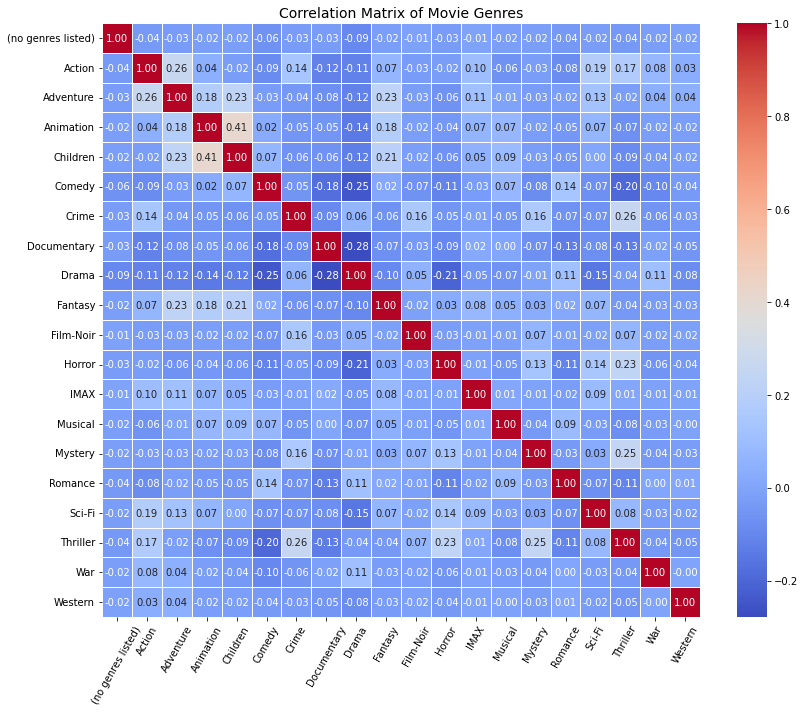

In [16]:
def plot_correlation_matrix(genres_data):
    
    """
    
    Function to Plot the heatmap of the correlation matrix between 
    movie genres to identify relation betweeen them.
    
    """
    genre_corr = genres_data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
    plt.title('Correlation Matrix of Movie Genres', fontsize = 14)
    plt.xticks(rotation=60) 
    plt.yticks(rotation=0)  
    plt.tight_layout() 
    plt.savefig('Correlation_Movie_Genres.png', dpi=300)
    plt.show()
    
genres_data = movies['genres'].str.get_dummies(sep='|')

# Plot the correlation matrix
plot_correlation_matrix(genres_data)

# Elbow plot

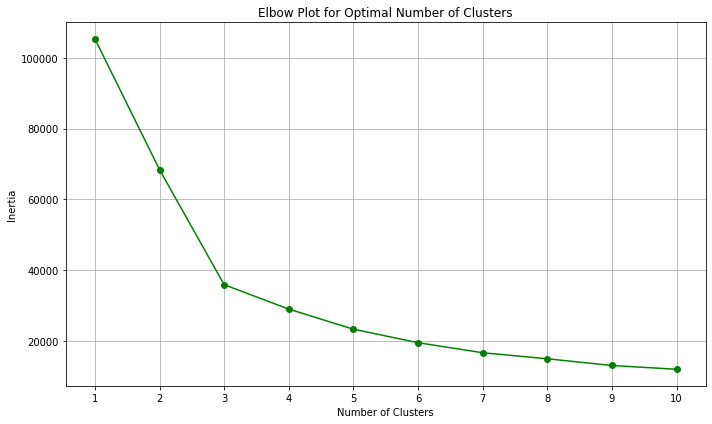

In [17]:
# Function to get the optimal clusters for the kmeans
def plot_elbow_plot(genres_data):
    """
    Plots the elbow plot to determine the optimal number of clusters for the Kmeans.

    Parameters:
    genres_data of the movies: The input data with genres as columns.

    """
    scaler = StandardScaler()
    genres_data_scaled = scaler.fit_transform(genres_data)
    pca = PCA(n_components=2)
    genres_data_pca = pca.fit_transform(genres_data_scaled)
    inertia = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        kmeans.fit(genres_data_pca)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o', color='green')
    plt.title('Elbow Plot for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('elbow_plot.png')
    plt.show()


# Load and preprocess the data
genres_data = movies['genres'].str.get_dummies(sep='|')

# Plot elbow plot to determine optimal number of clusters
plot_elbow_plot(genres_data)

In [18]:
# Function to find the optimal clusters using the silhouette scores.
def calculate_silhouette_scores(genres_data):
    """
    Calculate silhouette scores for different numbers of clusters.

    Parameters:
    genres_data of the movie: The input data with genres as columns.

    Returns:
    Silhouette scores for each number of clusters.
    """
    silhouette_scores = []
    scaler = StandardScaler()
    genres_data_scaled = scaler.fit_transform(genres_data)
    pca = PCA(n_components=2)
    genres_data_pca = pca.fit_transform(genres_data_scaled)
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        kmeans.fit(genres_data_pca)
        silhouette_scores.append(silhouette_score(genres_data_pca, kmeans.labels_))
    return silhouette_scores

# Load and preprocess the data
genres_data = movies['genres'].str.get_dummies(sep='|')

# Calculate silhouette scores
silhouette_scores = calculate_silhouette_scores(genres_data)

# Print silhouette scores
print("Silhouette scores for each number of clusters:")
for n_clusters, score in zip(range(2, 11), silhouette_scores):
    print(f"Number of clusters: {n_clusters}, Silhouette score: {score}")


Silhouette scores for each number of clusters:
Number of clusters: 2, Silhouette score: 0.5410497444242415
Number of clusters: 3, Silhouette score: 0.536617995750713
Number of clusters: 4, Silhouette score: 0.5271455555297129
Number of clusters: 5, Silhouette score: 0.46722531090200764
Number of clusters: 6, Silhouette score: 0.4790969332988847
Number of clusters: 7, Silhouette score: 0.42244910160049437
Number of clusters: 8, Silhouette score: 0.4219696437061594
Number of clusters: 9, Silhouette score: 0.4296669065119958
Number of clusters: 10, Silhouette score: 0.4655513616049397


# Clustering Predictions

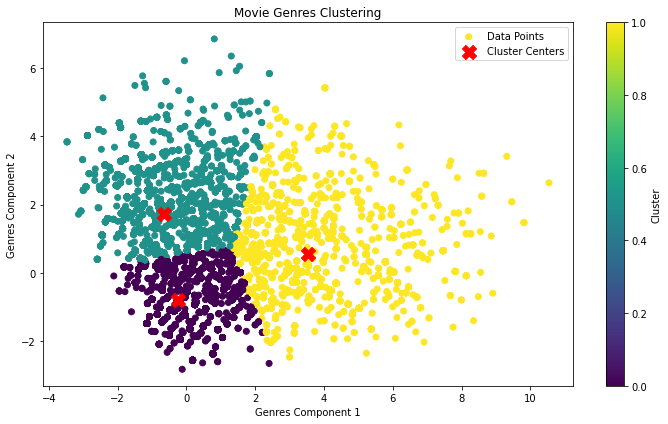

In [19]:
# Function to plot the cluster predictions
def plot_clustering_predictions(genres_data, n_clusters):
    """
    Plots the clustering predictions.

    Parameters:
    genres_data (DataFrame): The input data with genres as columns.
    n_clusters (int): The number of clusters.

    Returns:
    None
    """
    scaler = StandardScaler()
    genres_data_scaled = scaler.fit_transform(genres_data)
    pca = PCA(n_components=2)
    genres_data_pca = pca.fit_transform(genres_data_scaled)
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(genres_data_pca)
    cluster_centers = kmeans.cluster_centers_
    plt.figure(figsize=(10, 6))
    plt.scatter(genres_data_pca[:, 0], genres_data_pca[:, 1], c=labels, cmap='viridis', label='Data Points')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('Movie Genres Clustering')
    plt.xlabel('Genres Component 1')
    plt.ylabel('Genres Component 2')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.tight_layout()
    plt.savefig('clustering_predictions.png')
    plt.show()


# Determine the number of clusters based on the elbow method
n_clusters = 3 
genres_data = movies['genres'].str.get_dummies(sep='|')
# Plot clustering predictions
plot_clustering_predictions(genres_data, n_clusters)

# Line Fitting

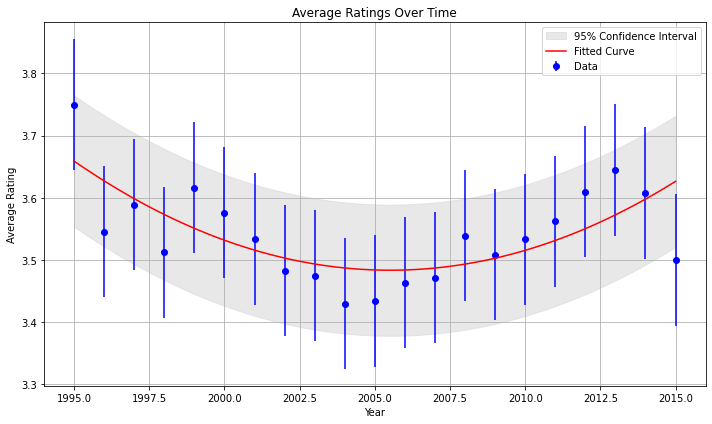

Parameter 1: 0.00 +/- 0.00
Parameter 2: -6.37 +/- 1.56
Parameter 3: 6388.41 +/- 1560.77

Fitting Predictions:
Year 2025: Predicted Rating = 4.09, Uncertainty = 0.25
Year 2026: Predicted Rating = 4.15, Uncertainty = 0.25
Year 2027: Predicted Rating = 4.22, Uncertainty = 0.25
Year 2028: Predicted Rating = 4.29, Uncertainty = 0.25
Year 2029: Predicted Rating = 4.36, Uncertainty = 0.25
Year 2030: Predicted Rating = 4.44, Uncertainty = 0.25
Year 2031: Predicted Rating = 4.51, Uncertainty = 0.25
Year 2032: Predicted Rating = 4.60, Uncertainty = 0.25
Year 2033: Predicted Rating = 4.68, Uncertainty = 0.25
Year 2034: Predicted Rating = 4.77, Uncertainty = 0.25
Year 2035: Predicted Rating = 4.86, Uncertainty = 0.25


In [20]:
# Function to fit the line 
def polynomial_func(x, a, b, c):
    """
    Fit function for a polynomial of the form: a * x^2 + b * x + c
        
    Returns:
    y : array_like
        The value of the polynomial function at x.
    """
    return a * x**2 + b * x + c


# Convert timestamp to datetime format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])

# Extract year from the timestamp
ratings['year'] = ratings['timestamp'].dt.year

# Group ratings by year and calculate average rating
average_ratings_by_year = ratings.groupby('year')['rating'].mean().reset_index()

# Fit the polynomial model using curve_fit
params, cov = curve_fit(polynomial_func, average_ratings_by_year['year'], average_ratings_by_year['rating'])

# Get the standard deviations of the parameters
std_devs = np.sqrt(np.diag(cov))

# Calculate confidence intervals
x_values = np.linspace(min(average_ratings_by_year['year']), max(average_ratings_by_year['year']), 100)
y_values = polynomial_func(x_values, *params)

# 95% confidence interval for normally distributed errors
conf_interval = 1.96 * np.sqrt(np.mean((polynomial_func(average_ratings_by_year['year'], *params) - average_ratings_by_year['rating'])**2))  

# Plot the average ratings over time
plt.figure(figsize=(10, 6))

# Plot the confidence interval
plt.fill_between(x_values, y_values - conf_interval, y_values + conf_interval, color='lightgray', alpha=0.5, label='95% Confidence Interval')

# Plot the data points with error bars
plt.errorbar(average_ratings_by_year['year'], average_ratings_by_year['rating'], yerr=conf_interval, fmt='o', color='blue', label='Data')

# Plot the fitted curve
plt.plot(x_values, y_values, color='red', label='Fitted Curve', zorder=3)

plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the parameters with their uncertainties
for i, param in enumerate(params):
    print(f"Parameter {i+1}: {param:.2f} +/- {std_devs[i]:.2f}")

# Perform fitting predictions with associated uncertainties
# Predictions for the next 10 years
future_years = np.arange(2025, 2036) 
future_ratings = polynomial_func(future_years, *params)
prediction_uncertainty = np.sqrt(np.mean(np.diag(np.dot(np.dot(np.vstack([future_years**2, future_years, np.ones_like(future_years)]).T, cov), np.vstack([future_years**2, future_years, np.ones_like(future_years)])))))

print("\nFitting Predictions:")
for year, rating in zip(future_years, future_ratings):
    print(f"Year {year}: Predicted Rating = {rating:.2f}, Uncertainty = {prediction_uncertainty:.2f}")
